<a href="https://colab.research.google.com/github/Neeraj6maths/cardiovascular_disease_prediction/blob/main/ML_Classification_Cardiovascular_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. **The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD)**. The dataset provides the patients’ information. \
It includes over 4,000 records and 15 attributes. 

In [ ]:
# hiding all warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing all the important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC

In [ ]:
# importing the dataset and creating dataframe
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/capstone projects/Supervised ML - Classification/Cardiovascular risk/Copy of data_cardiovascular_risk.csv")

In [ ]:
# taking a look at the data
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# getting basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# getting statistical summary of data
df.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [ ]:
# Checking no. of null values in the data
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Null values are present, we will remove them later in project.

In [ ]:
# checking for duplicate rows
df.duplicated().sum()

0

No duplicate rows are present

#EDA

## Univariate Analysis

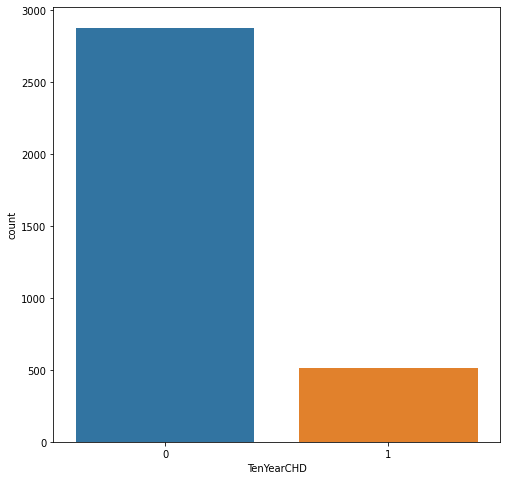

In [ ]:
# Plotting the countplot for dependent variable
dep_variable = 'TenYearCHD'
plt.figure(figsize = (8,8))
sbn.countplot(df[dep_variable])
plt.show()

In [ ]:
df[dep_variable].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

Given data is highly imbalanced.

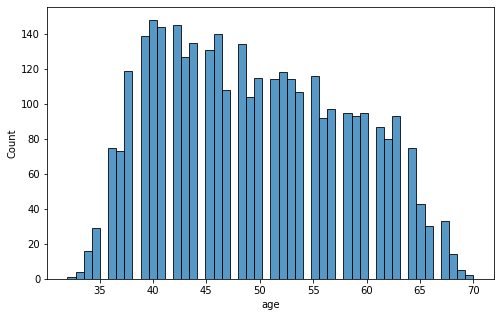

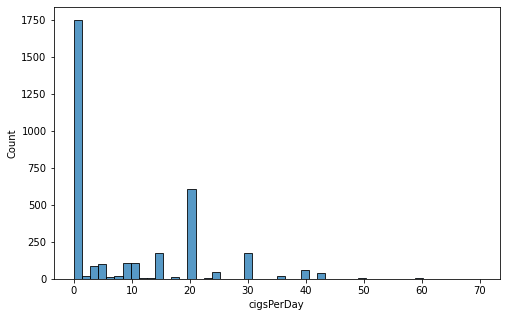

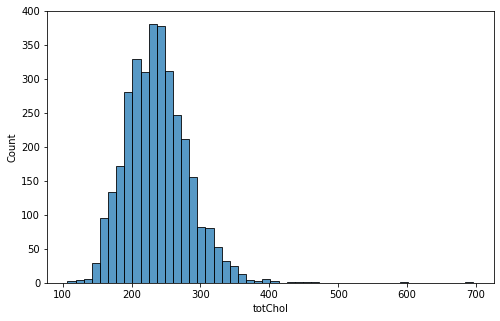

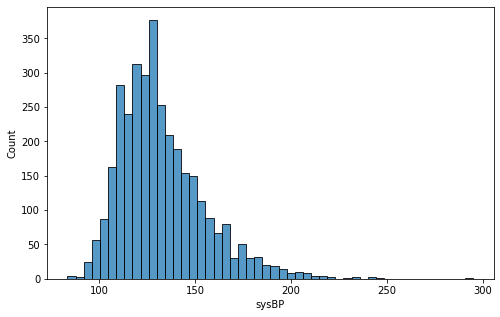

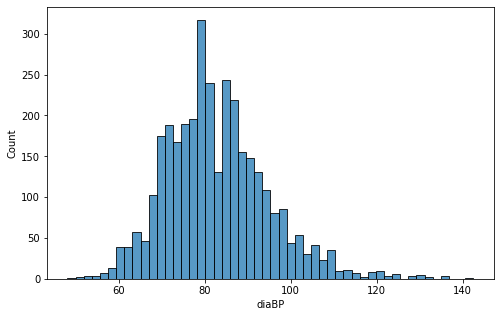

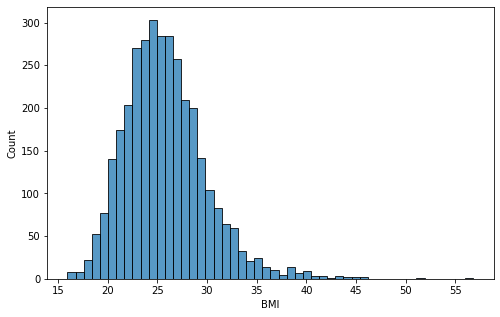

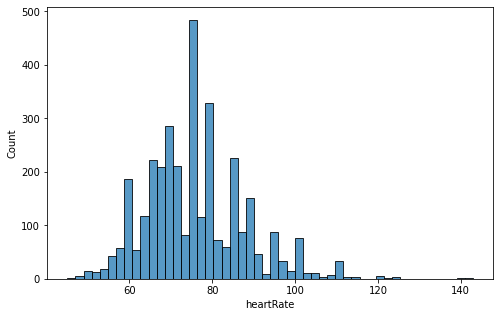

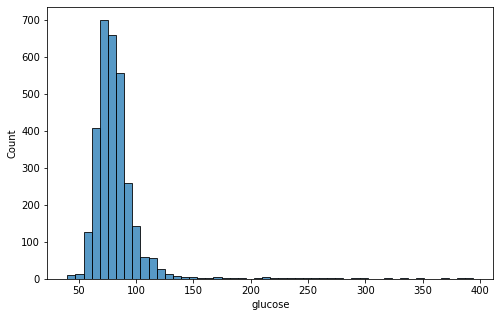

In [ ]:
# Plotting distribution of values of cts numerical features
cts_features = ['id','age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for col in cts_features[1:]:
  plt.figure(figsize = (8,5))
  sbn.histplot(df[col], bins = 50)

Most of the numerical features are positively skewed.

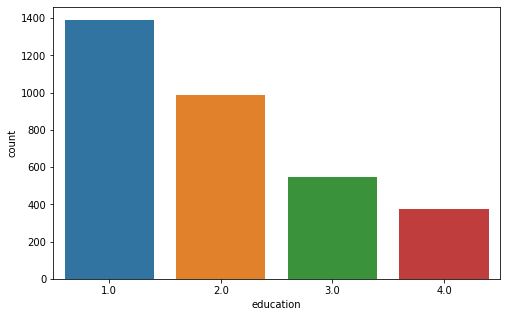

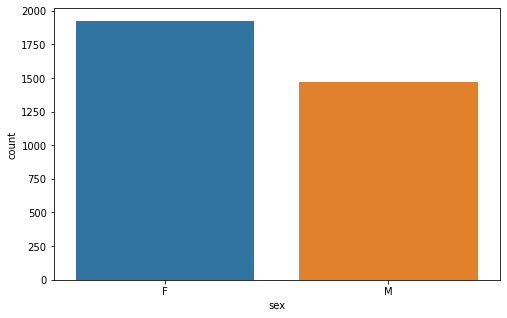

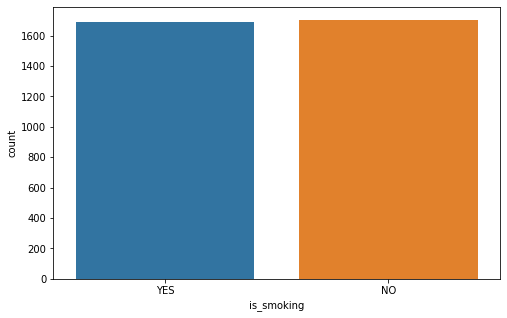

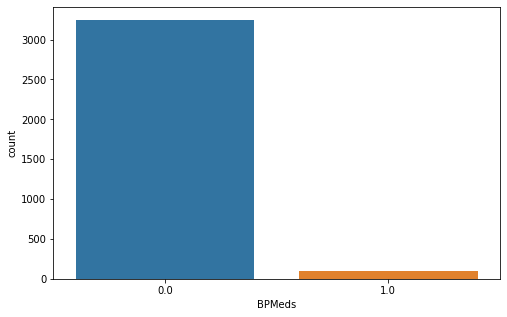

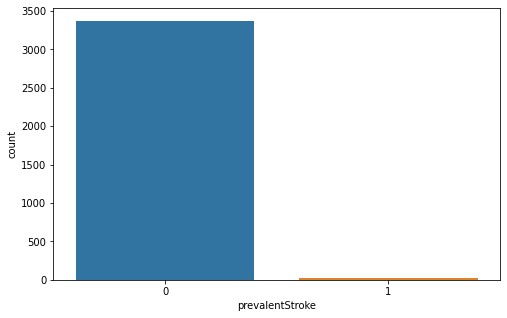

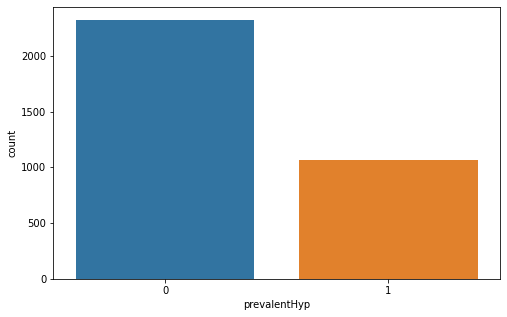

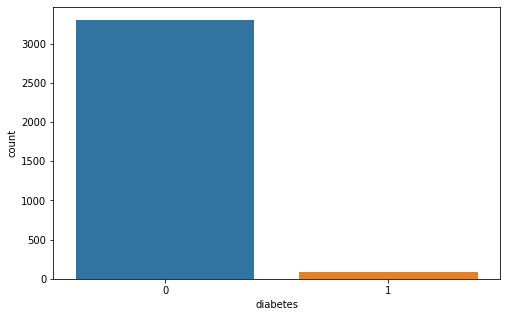

In [ ]:
# plotting the count plot of categorical features
cat_features = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for col in cat_features:
  plt.figure(figsize = (8,5))
  sbn.countplot(df[col])
  plt.show()

Input features like 'diabetes', 'prevalentStroke' and 'BPMeds' are highly imbalanced.

## Bivariate analysis

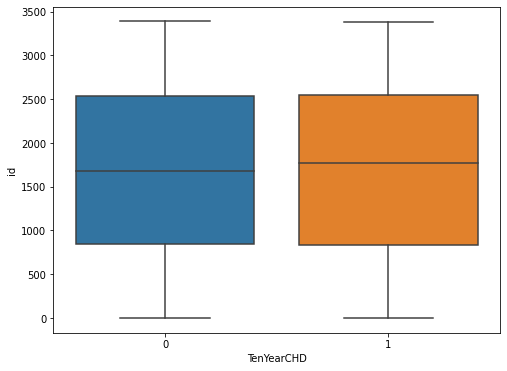

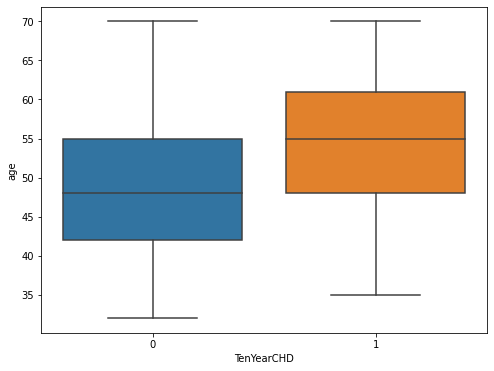

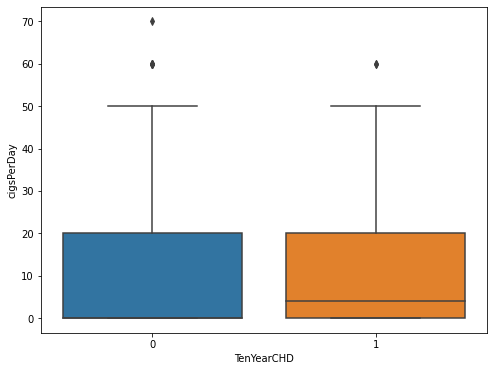

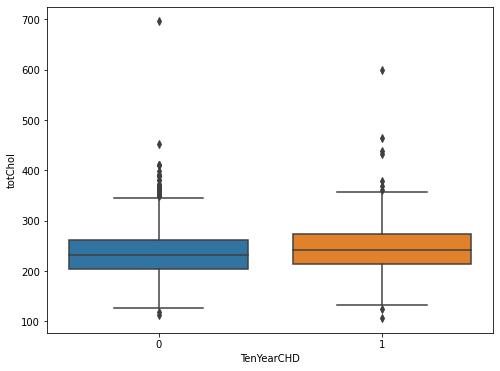

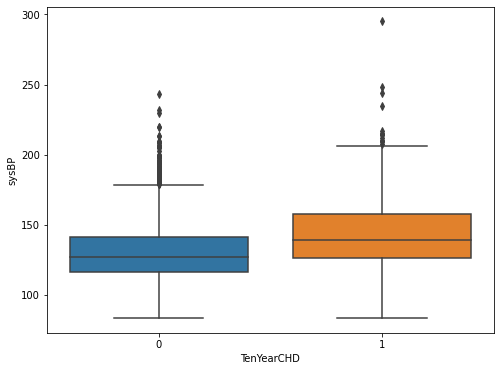

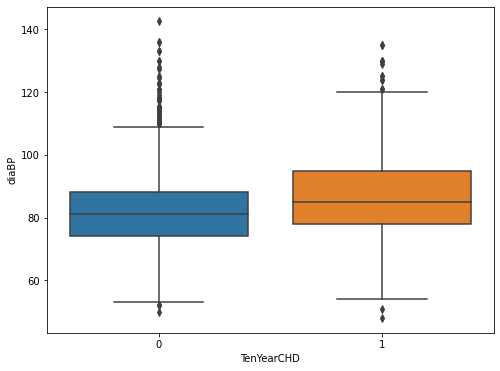

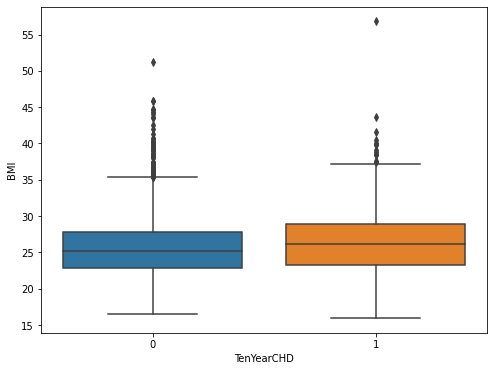

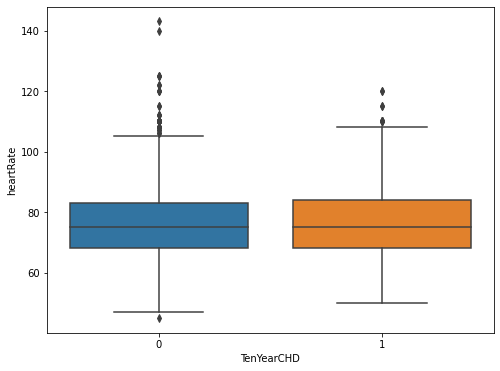

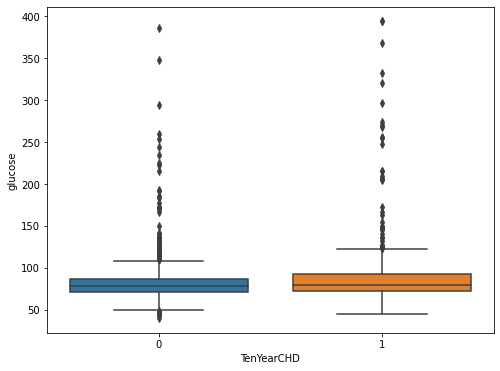

In [ ]:
# plotting boxplot for continous features for each class of dependent feature.
for col in cts_features:
  plt.figure(figsize = (8,6))
  sbn.boxplot(x = df[dep_variable],y = df[col])

Average value of 'age', 'Cigsperday', 'SysBP', 'DiaBP' and 'BMI' is higher for people at risk of cardiovascular disease.

Percentage of people in each class of categorical features for each class of dependent variable.

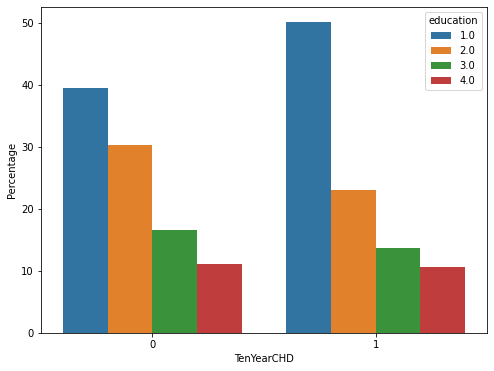

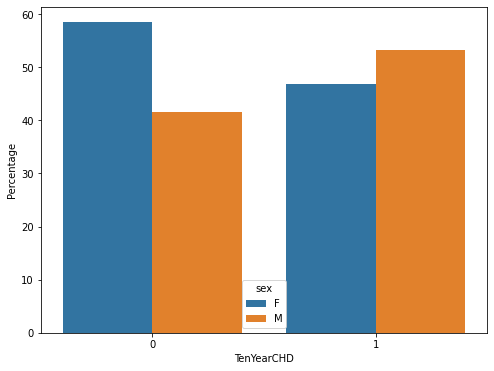

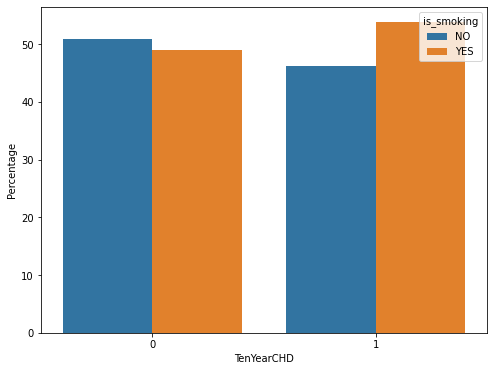

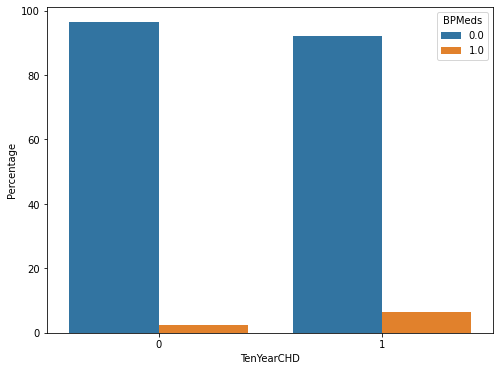

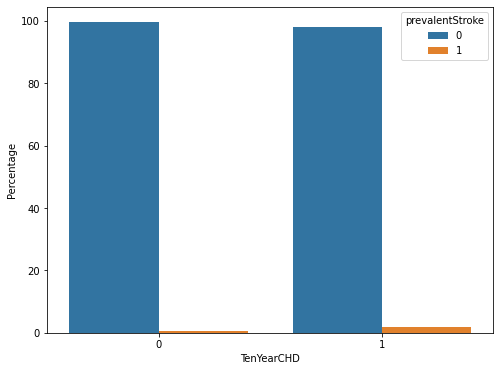

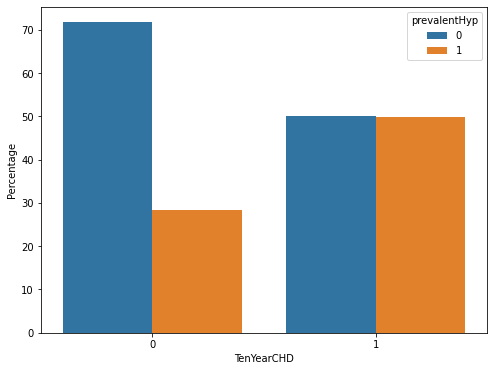

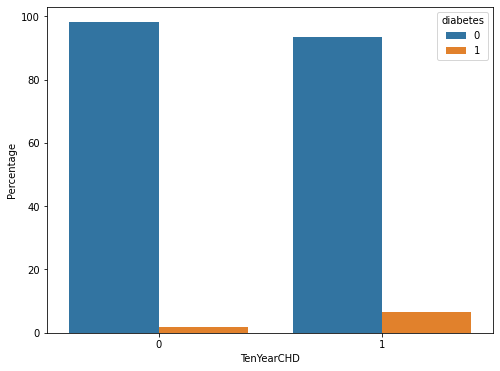

In [ ]:

df_groupby = df.groupby(by = dep_variable)   # Grouping data by dependent variable
for col in cat_features:
  df_plot = pd.DataFrame((df_groupby[col].value_counts()/df_groupby['id'].count())*100).reset_index().rename(columns = {0:'Percentage'})
  # creating dataframe for each categorical variable with relative percentage.
  plt.figure(figsize = (8,6))
  sbn.barplot(x = df_plot[dep_variable], y = df_plot['Percentage'] , hue = df_plot[col])
  # plotting percentage wise barplot  

(1)Percentage distribution of education level is almost similar for both high risk and low risk patients. \
(2) More percentage of men are at high risk for getting cardiovascular disease. \
(3) Higher percentage of people who are smoking are at high risk. \
(4) For people at high risk of cardiovascular disease there is 50% chance that they had prevalent hypertension.


Out of people having 'diabetes', 'prevalentStroke' , 'BPMeds' how many are at risk of cardiac disease.

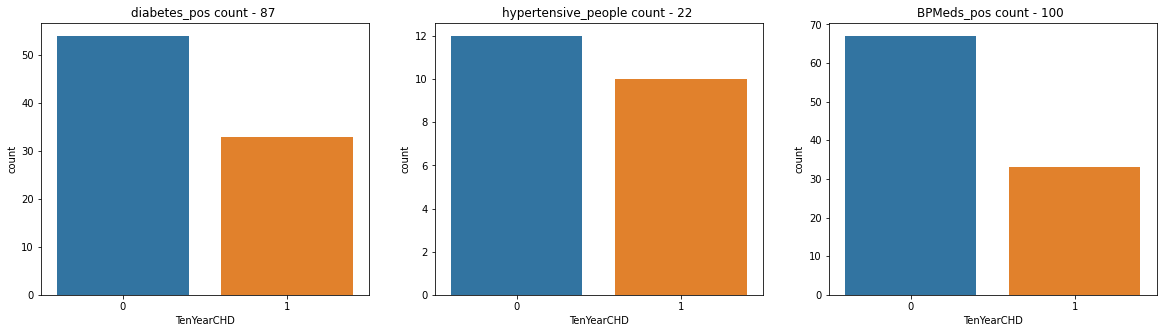

In [ ]:
diabetes_pos = df[df['diabetes'] == 1]                # creating dataset for diabetes positive people.
hypertensive_people = df[df['prevalentStroke'] == 1]  # creating dataset for hypertensive people.
BPMeds_pos = df[df['BPMeds'] == 1]                    # creatinf dataset for people taking BP medicines.

# plotting countplot
fig, ax = plt.subplots(1,3,figsize = (20,5))
i = 0
for data_set in ['diabetes_pos','hypertensive_people', 'BPMeds_pos']:
  sbn.countplot(eval(data_set)[dep_variable],ax = ax[i])
  ax[i].set_title(f"{data_set} count - {eval(data_set).shape[0]} ")
  i += 1
plt.show()

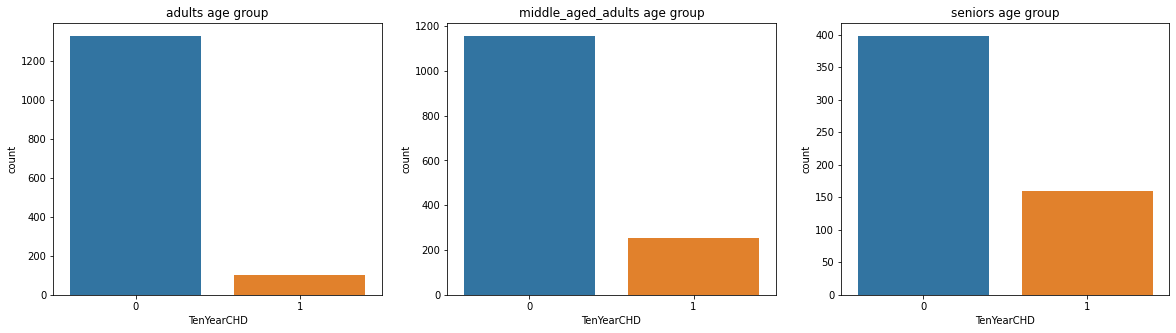

In [ ]:
seniors = df[df['age'] >= 60]   # Creating dataframe of senior people
adults = df[df['age'] < 47]     # Creating dataframe of adult (relatively younger) people
middle_aged_adults = df[(df['age'] >= 47) & (df['age'] < 60)]      # Creating dataframe of middle ages adult people

# Plotting countplot of disease risk for each age group
fig, ax = plt.subplots(1,3,figsize = (20,5))
i = 0
for data_set in ['adults','middle_aged_adults','seniors']:
  sbn.countplot(eval(data_set)[dep_variable],ax = ax[i])
  ax[i].set_title(f"{data_set} age group")
  i += 1
  
plt.show()

Senior age groups (> 59 years) are relatively at much higher risk for cardiovascular disease and adults (>= 32 but < 47 years) are relatively at lowest risk.

## Multivariate analysis

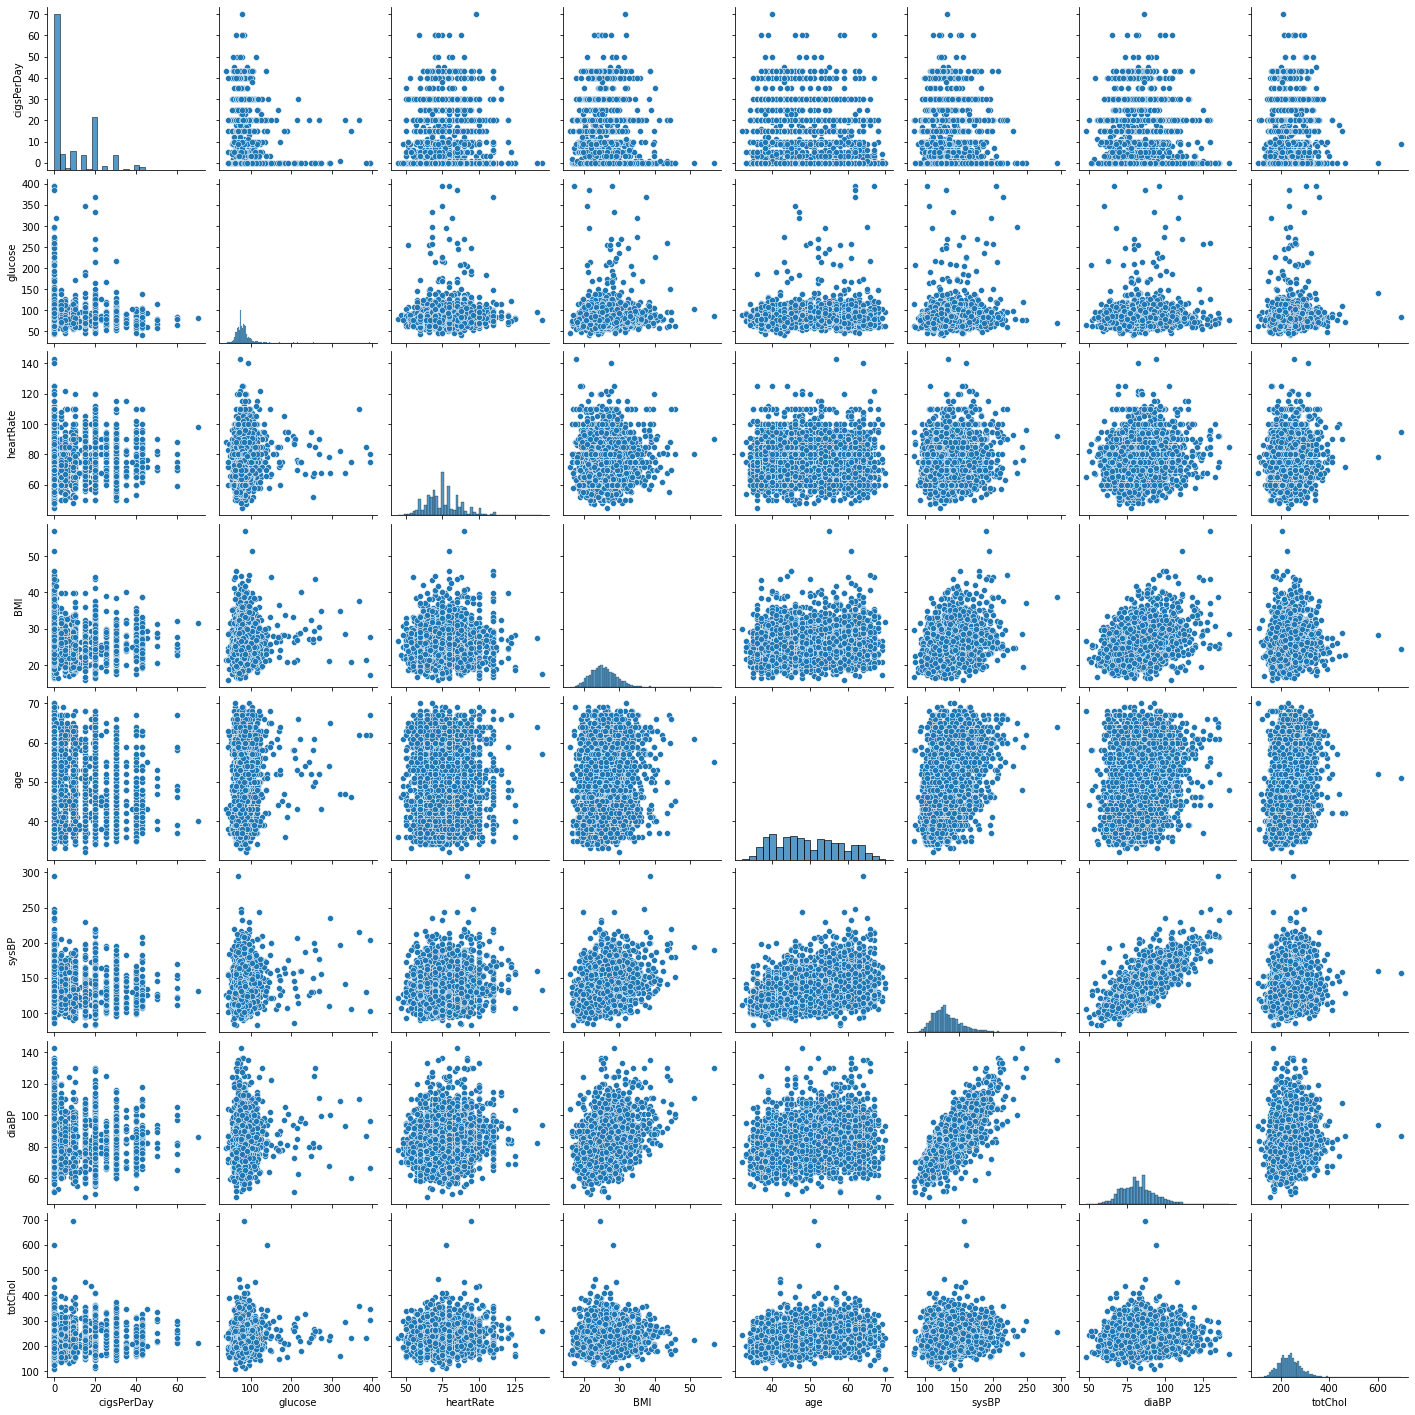

In [ ]:
# Plotting pair plot for numerical variables 
num_features = list(set(cts_features)-{'id'})   # removing id variable
num_df = df[num_features]
sbn.pairplot(num_df)
plt.show()

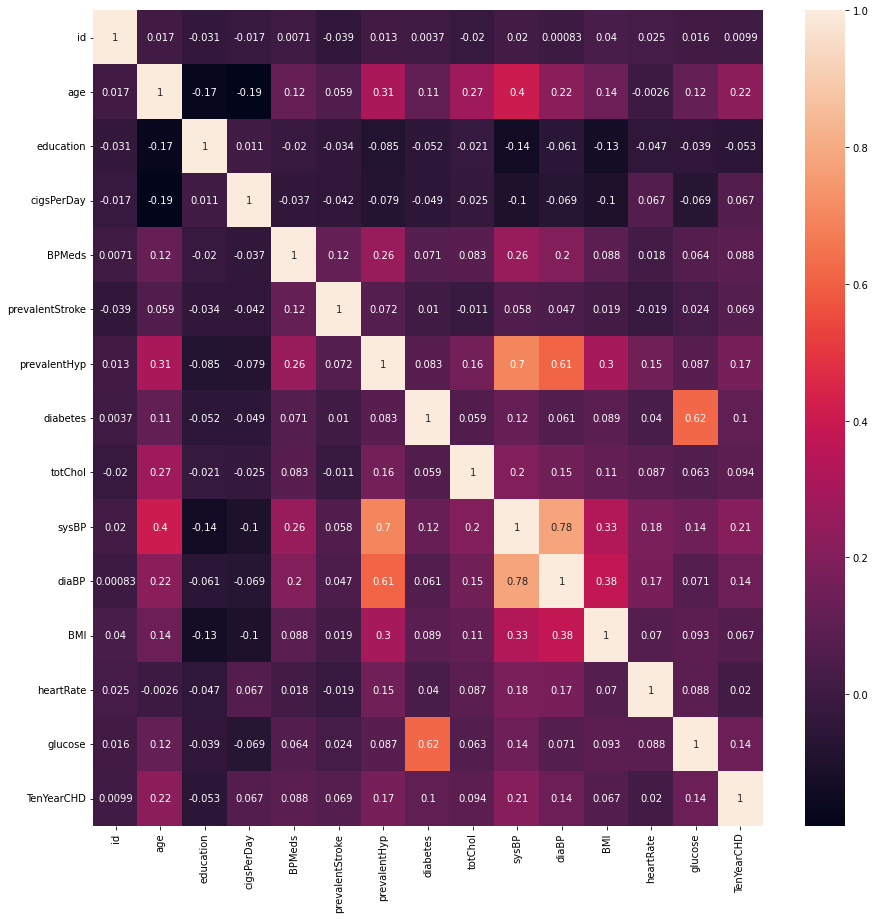

In [ ]:
# Checking correlation of each numerical feature
plt.figure(figsize = (15,15))
df_corr = df.corr()
sbn.heatmap(df_corr, annot = True)

(1) 'sysBP' and 'diaBP' are highly correlated with 0.78 correlation. \
(2) 'glucose' and 'diabetes' are also slighly correlated with 0.62 correlation.\
(3) 'sysBP' and 'prevalentHyp' are 0.7 correlated. \
(4) 'diaBP' and 'prevalentHyp' are also 0.61 correlated.

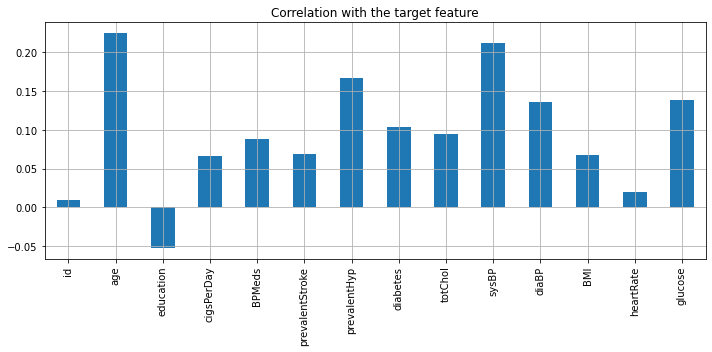

In [ ]:
# plotting correaltion with dependent feature

df.drop(dep_variable, axis=1).corrwith(df[dep_variable]).plot(kind='bar', grid=True, figsize=(10, 5), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

No feature is strongly correlated with the dependent variable.

# Splitting data into train and test sets.

In [ ]:
y = df[dep_variable]                       # target variable
x = df.drop(columns = [dep_variable])      # independent features
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

We have splitted data into train and test before feature engineering to avoid any kind of data leakage.

# Feature Engineering

## Labelling the object type categorical feature.

In [ ]:
x_train.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2134,2134,54,1.0,F,NO,0.0,0.0,0,0,0,272.0,146.0,95.0,23.66,72.0,80.0
1161,1161,37,2.0,M,YES,9.0,0.0,0,0,0,237.0,102.0,72.0,19.68,67.0,83.0
137,137,39,1.0,M,YES,43.0,0.0,0,1,0,291.0,177.5,100.0,25.74,67.0,91.0
2170,2170,55,1.0,F,NO,0.0,0.0,0,0,0,225.0,136.5,85.5,20.56,60.0,90.0
2876,2876,59,2.0,M,NO,0.0,0.0,0,0,0,237.0,131.5,84.0,24.17,90.0,94.0


Since, 'sex' and 'is_smoking' columns are in string format. We have to encode them to numerical data type.

In [ ]:
def encoding_variables(dataset):
  ''' input - dataframe
      This function inputs the dataframe and label encode the 'sex' and 'is_smoking' column and then 
      returns the modified dataframe.'''
  dataset['sex'] = np.where(dataset['sex'] == 'M',1,0)                         # encoding 'M' as 1 and 'F' as 0 in 'sex' column
  dataset['is_smoking'] = np.where(dataset['is_smoking'] == 'YES', 1,0)        # encoding 'YES' as 1 and 'NO' as 0 in 'is_smoking' column
  return dataset

In [ ]:
x_train = encoding_variables(x_train)      # encoding features of x_train dataset
x_test = encoding_variables(x_test)        # encoding features of x_test dataset

## Removing null values.

In [ ]:
x_train.isnull().sum()  #checking null values in training dataset

id                   0
age                  0
education           70
sex                  0
is_smoking           0
cigsPerDay          17
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             25
sysBP                0
diaBP                0
BMI                 11
heartRate            1
glucose            243
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer   # Importing SimpleImputer

def impute_null_values(dataset_train, dataset_test, cts_features, cat_features):
  ''' input - training dataset, testing dataset, numerical features, categorical features 
      This function divides the input datasets into numerical and categorical datasets then apply different imputation techniques
      based on the numerical or categorical columns after that concats the dataframes and returns them. '''


  num_feat_train = dataset_train[cts_features]   # Creating numerical train dataframe
  num_feat_test  = dataset_test[cts_features]    # Creating numerical test dataframe
  cat_feat_train = dataset_train[cat_features]   # Creating categorical train dataframe
  cat_feat_test =  dataset_test[cat_features]    # Creating categorical test dataframe

  imputer1 = SimpleImputer(strategy = 'median')  # defining imputer for numerical columns
  imputer2 = SimpleImputer(strategy = 'most_frequent') # defining imputer for categorical columns

  num_feat_train = pd.DataFrame(imputer1.fit_transform(num_feat_train))       # fitting imputer on num train dataframe
  num_feat_train.columns = cts_features
  num_feat_test = pd.DataFrame(imputer1.transform(num_feat_test))             # fitting imputer on num test dataframe
  num_feat_test.columns = cts_features

  cat_feat_train = pd.DataFrame(imputer2.fit_transform(cat_feat_train))       # fitting imputer on categorical train dataframe
  cat_feat_train.columns = cat_features
  cat_feat_test = pd.DataFrame(imputer2.transform(cat_feat_test))             # fitting imputer on categorical train dataframe
  cat_feat_test.columns = cat_features

  dataset_train = pd.concat([num_feat_train,cat_feat_train], axis = 1)       # concatenating train dataframe
  dataset_test = pd.concat([num_feat_test,cat_feat_test], axis = 1)          # concatenating test dataframe
  return dataset_train, dataset_test

  

In [ ]:
x_train, x_test = impute_null_values(x_train,x_test,cts_features, cat_features)   # calling null values imputing function

In [ ]:
print(f"No. of null values in x_train dataset after imputation : {x_train.isnull().sum().sum()}.")
print(f"No. of null values in x_test dataset after imputation : {x_test.isnull().sum().sum()}.")


No. of null values in x_train dataset after imputation : 0.
No. of null values in x_test dataset after imputation : 0.


## Feature Selection

'id' feature is unique for each row and therefore not informative for model training. Hence we will drop 'id' column.

In [ ]:
def drop_column(dataset, col):
  ''' input - dataframe, column 
      This function inputs a dataframe and a column to drop from the dataframe and then
      returns the modified dataframe.'''
  dataset.drop(columns = [col], inplace = True)
  return dataset

In [ ]:
x_train = drop_column(x_train, 'id')    # dropping 'id' from x_train
x_test = drop_column(x_test, 'id')      # dropping 'id' from x_test

### Applying Chi-square test for feature selection from categorical features.

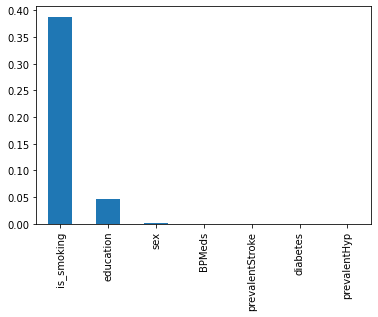

In [ ]:
from sklearn.feature_selection import chi2          # importing chi2
chi_scores = chi2(x_train[cat_features],y_train)    # calculating chi scores and corresponding p-values for only categorical features

p_values = pd.Series(chi_scores[1],index = x_train[cat_features].columns)      # creating dataframe of p-values of categorical features 
p_values.sort_values(ascending = False , inplace = True)                       # sorting dataframe

p_values.plot.bar()
plt.show()                                                            # plotting p-values bar plot

Since, p-value for 'is_smoking' is very high, so we will drop that column. \

Also one thing to notice is that, we are also given a column 'cigsPerDay' which tells us the average no. of ciggerates smoked per day by the person. If person doesn't smoke then it is zero. So, the information given in 'is_smoking' is already present in 'cigsPerDay'. Hence we can drop the 'is_smoking' column.

In [ ]:
x_train = drop_column(x_train, 'is_smoking')
x_test = drop_column(x_test, 'is_smoking')

Calculating collinearity between each independent variable

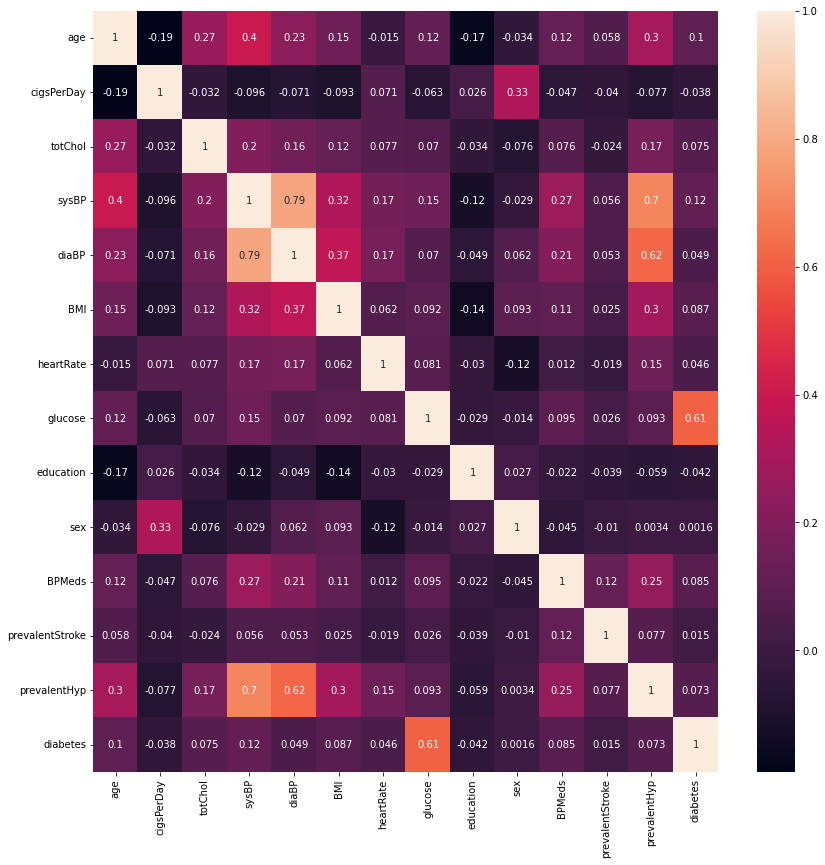

In [ ]:
x_train_corr = x_train.corr()
plt.figure(figsize = (14,14))
sbn.heatmap(x_train_corr, annot = True)

Since 'sysBP' and 'diaBP' have high correlation we will drop one of them.

In [ ]:
x_train = drop_column(x_train, 'diaBP')
x_test = drop_column(x_test, 'diaBP')

We have dropped 'diaBP' column.

## Reducing skewness

In [ ]:
# checking skewness of cts numerical features
x_train[['age','cigsPerDay','totChol','BMI','sysBP','heartRate','glucose']].skew()  

age           0.226856
cigsPerDay    1.193935
totChol       1.096632
BMI           1.040581
sysBP         1.222969
heartRate     0.660109
glucose       6.539919
dtype: float64

In [ ]:
# Applying log10 transformation to reduce skewness
np.log10(x_train[['age','cigsPerDay','totChol','BMI','sysBP','heartRate','glucose']]).skew()

age          -0.017192
cigsPerDay         NaN
totChol       0.064625
BMI           0.359000
sysBP         0.625883
heartRate     0.144671
glucose       2.390359
dtype: float64

In [ ]:
# Apply sqrt transformation to reduce skewness
np.sqrt(x_train[['age','cigsPerDay','totChol','BMI','sysBP','heartRate','glucose']]).skew()

age           0.105442
cigsPerDay    0.469819
totChol       0.497706
BMI           0.672935
sysBP         0.904974
heartRate     0.395982
glucose       4.154347
dtype: float64

In [ ]:
def reduce_skewness(dataset):
  '''input - dataframe
    This function takes the skewed dataframe and applies transformation on them
    and returns the transformed dataframe.'''
  dataset[['totChol','sysBP','BMI','heartRate','glucose']] = np.log10(dataset[['totChol','sysBP','BMI','heartRate','glucose']])
  dataset[['cigsPerDay']] = np.sqrt(dataset[['cigsPerDay']])
  return dataset
  

In [ ]:
x_train = reduce_skewness(x_train)   # reducing skewness of x_train
x_test = reduce_skewness(x_test)     # reducing skewness of x_test

## Handling Imbalanced dataset

In [ ]:
y_train.value_counts()

0    2305
1     407
Name: TenYearCHD, dtype: int64

Since our given dataset is highly imbalanced. Hence we will use some resampling techniques called SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE    # importing SMOTE

smote = SMOTE()                             # defining SMOTE

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)   

print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 2712
Resampled dataset shape 4610


In [ ]:
y_smote.value_counts()

0    2305
1    2305
Name: TenYearCHD, dtype: int64

## Model Training and evaluation

## Without hyperparameter tuning

In [ ]:
from sklearn.preprocessing import StandardScaler

def rescaling(x_train, x_test):
  ''' input - training dataset, testing dataset
      This functions input a pair of datasets one training and other one testing.
      This funtions fits and transforms the scaler on training dataset and uses same scaler to transform
      the testing dataset. It returns the transformed datasets.'''
  scale = StandardScaler()
  x_train = scale.fit_transform(x_train)
  x_test = scale.transform(x_test)

  return x_train, x_test

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
def evaluating_model(model,x_train, x_test, y_train, y_test):
  '''This fucntion inputs the model and various datasets.
     It then predicts using the model and input datasets after that it evaluates the prediction
     using various metrics and returns the result of evaluation.'''
  y_train_pred = model.predict(x_train)                         
  y_train_pred_proba = model.predict_proba(x_train)[:,1]
  y_pred = model.predict(x_test)
  y_pred_proba = model.predict_proba(x_test)[:, 1]

  print('-------------- Train set evaluation ---------------')

  print(f"Train accuracy_score : {round(accuracy_score(y_train,y_train_pred),4)}")
  
  print(f"Train roc_auc_score : {round(roc_auc_score(y_train,y_train_pred_proba),4)}")

  print(f"Train f1_score : {round(f1_score(y_train,y_train_pred),4)}")
  
  print(f"Train precision score : {round(precision_score(y_train,y_train_pred),4)}")

  print(f"Train recall score : {round(recall_score(y_train,y_train_pred),4)}")

  print(f"Train confusion matrix : \n{confusion_matrix(y_train,y_train_pred)}\n")

  print('-------------- Test set evaluation ---------------')

  print(f"Test accuracy_score : {round(accuracy_score(y_test,y_pred),4)}")
  
  print(f"Test roc_auc_score : {round(roc_auc_score(y_test,y_pred_proba),4)}")

  print(f"Test f1_score : {round(f1_score(y_test,y_pred),4)}")
  
  print(f"Test precision score : {round(precision_score(y_test,y_pred),4)}")

  print(f"Test recall score : {round(recall_score(y_test,y_pred),4)}\n")

  print(f"Test confusion matrix : \n{confusion_matrix(y_test,y_pred)}\n")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Defining functions for defining various models without hyperparameter tuning

def randomforest_fit(x_train, y_train):
  ''' Defining and training random forest model '''
  RF = RandomForestClassifier( random_state = 0)
  RF.fit(x_train,y_train)
  return RF

def gradientboosting_fit(x_train,y_train):
  ''' Defining and training gradient boosting model '''
  GB1 = GradientBoostingClassifier(random_state = 0)
  GB1.fit(x_train,y_train)
  return GB1

def supportvector_fit(x_train, y_train):
  ''' Defining and training SVM model '''
  svc1 = SVC(probability = True)
  svc1.fit(x_train,y_train)
  return svc1

def logisticregression_fit(x_train,y_train):
  ''' Defining and training logistic regression model '''
  logreg = LogisticRegression()
  logreg.fit(x_train, y_train)
  return logreg

def knn_fit(x_train,y_train):
  ''' Defining and training knn model '''
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)
  return knn

In [ ]:
# Defining random forest model
rf1 = randomforest_fit(x_smote, y_smote)

# Defining gradient boosting model
gb1 = gradientboosting_fit(x_smote, y_smote)

# Scaling data for models that require data to be standarized
x_train_scaled, x_test_scaled = rescaling(x_smote, x_test)

# Defining SVM model
svm1 = supportvector_fit(x_train_scaled,y_smote)

# Defining logistic regression model
lr1 = logisticregression_fit(x_train_scaled,y_smote)

# Defining knn model
knn1 = knn_fit(x_train_scaled,y_smote)

In [ ]:
# Evaluating random forest model
evaluating_model(rf1,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 1.0
Train roc_auc_score : 1.0
Train f1_score : 1.0
Train precision score : 1.0
Train recall score : 1.0
Train confusion matrix : 
[[2305    0]
 [   0 2305]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.792
Test roc_auc_score : 0.663
Test f1_score : 0.2618
Test precision score : 0.2874
Test recall score : 0.2404

Test confusion matrix : 
[[512  62]
 [ 79  25]]



In [ ]:
# Evaluating GBBoost model
evaluating_model(gb1,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.8794
Train roc_auc_score : 0.9493
Train f1_score : 0.875
Train precision score : 0.9081
Train recall score : 0.8443
Train confusion matrix : 
[[2108  197]
 [ 359 1946]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.7611
Test roc_auc_score : 0.6507
Test f1_score : 0.2286
Test precision score : 0.2264
Test recall score : 0.2308

Test confusion matrix : 
[[492  82]
 [ 80  24]]



In [ ]:
# Evaluating SVM model
evaluating_model(svm1,x_train_scaled, x_test_scaled, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.7909
Train roc_auc_score : 0.8761
Train f1_score : 0.7868
Train precision score : 0.8024
Train recall score : 0.7718
Train confusion matrix : 
[[1867  438]
 [ 526 1779]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.7257
Test roc_auc_score : 0.6314
Test f1_score : 0.3261
Test precision score : 0.2616
Test recall score : 0.4327

Test confusion matrix : 
[[447 127]
 [ 59  45]]



In [ ]:
# Evaluating Logistic regression model
evaluating_model(lr1,x_train_scaled, x_test_scaled, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.6761
Train roc_auc_score : 0.7426
Train f1_score : 0.6772
Train precision score : 0.675
Train recall score : 0.6794
Train confusion matrix : 
[[1551  754]
 [ 739 1566]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.646
Test roc_auc_score : 0.6775
Test f1_score : 0.3583
Test precision score : 0.2481
Test recall score : 0.6442

Test confusion matrix : 
[[371 203]
 [ 37  67]]



In [ ]:
# Evaluating KNN model
evaluating_model(knn1,x_train_scaled, x_test_scaled, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.8783
Train roc_auc_score : 0.9764
Train f1_score : 0.8897
Train precision score : 0.8137
Train recall score : 0.9813
Train confusion matrix : 
[[1787  518]
 [  43 2262]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.6475
Test roc_auc_score : 0.6135
Test f1_score : 0.3191
Test precision score : 0.2267
Test recall score : 0.5385

Test confusion matrix : 
[[383 191]
 [ 48  56]]



We are using Logistic regression and Random Forest for hyperparameter tuning.

## With hyperparameter tuning

In [ ]:

def randomforest_fit_hpt(x_train, y_train):
  ''' defining random forest model with hyperparameter tuning''' 
  param_dict = {'n_estimators' : [1000],
                'criterion' : ['gini'],
                'max_depth' : list(np.linspace(4, 45,  dtype = int)),
                'max_features' : ['sqrt', 'log2', 0.3,0.4,0.5],
                # 'min_samples_split' : list(np.linspace(4, 30, dtype = int)) ,
                'max_samples' : list(np.linspace(0.4,1,7)),
                'min_samples_leaf' : list(np.linspace(15, 45, 15, dtype = int))}
                #'max_leaf_nodes' : list(np.linspace(1, 100, 25, dtype = int))}
  RF = RandomForestClassifier( random_state = 0)
  model = RandomizedSearchCV(estimator = RF, param_distributions = param_dict, scoring = 'f1' ,
                               cv = 5, random_state= 10)
  model.fit(x_train,y_train)
  return model




def logisticregression_fit_hpt(x_train,y_train):
  ''' defining logistic regression with hyperparameter tuning'''
  param_dict = {'penalty' : ['l1', 'l2', 'elasticnet'],
              'C' : list(np.linspace(0.01,10,100)),
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  logreg = LogisticRegression(random_state = 0)
  model = RandomizedSearchCV(estimator = logreg, param_distributions = param_dict, scoring = 'f1' ,
                               cv = 5, random_state= 10)

  model.fit(x_train, y_train)
  return model


In [ ]:

rf2 = randomforest_fit_hpt(x_smote,y_smote)

lr2 = logisticregression_fit_hpt(x_smote,y_smote)

In [ ]:
rf2.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 0.5,
 'max_samples': 0.7,
 'min_samples_leaf': 17,
 'n_estimators': 1000}

In [ ]:
lr2.best_params_

{'C': 3.5418181818181815, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
# Evaluating random forest model
evaluating_model(rf2,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.8696
Train roc_auc_score : 0.9509
Train f1_score : 0.8671
Train precision score : 0.8845
Train recall score : 0.8503
Train confusion matrix : 
[[2049  256]
 [ 345 1960]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.7375
Test roc_auc_score : 0.662
Test f1_score : 0.2764
Test precision score : 0.2394
Test recall score : 0.3269

Test confusion matrix : 
[[466 108]
 [ 70  34]]



In [ ]:
# Evaluating Logistic regression model
evaluating_model(lr2,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.6746
Train roc_auc_score : 0.7422
Train f1_score : 0.6755
Train precision score : 0.6737
Train recall score : 0.6772
Train confusion matrix : 
[[1549  756]
 [ 744 1561]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.6342
Test roc_auc_score : 0.681
Test f1_score : 0.3474
Test precision score : 0.2391
Test recall score : 0.6346

Test confusion matrix : 
[[364 210]
 [ 38  66]]



Even after hyperparameter tuning F1- score is very low. This can be due to the nature of the data. No relation can be found between independent and depedent feature.

Let us now try changing the threshold and evaluate model over test dataset for each threshold.

In [ ]:
# predicting probability of each class by hyperparameter tuned Random forest model
predicted_proba = rf2.predict_proba(x_test)

accuracy = []
f1scores = []
precisionscore = []
recallscore = []

# for loop for different value of threshold
for threshold in np.linspace(0.1,0.9,50):
  predicted_proba[:,1] >= threshold
  predictions = (predicted_proba [:,1] >= threshold).astype('int')
  accuracy.append(accuracy_score(y_test,predictions))
  f1scores.append(f1_score(y_test,predictions))
  precisionscore.append(precision_score(y_test,predictions))
  recallscore.append(recall_score(y_test,predictions))

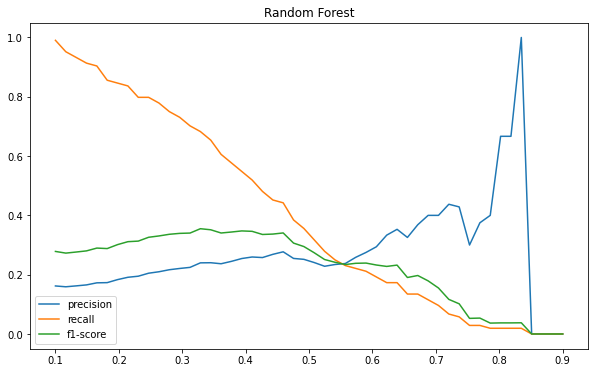

In [ ]:
# plotting the recall, precision and f1-score for different threshold of Random forest
plt.figure(figsize = (10,6))
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = precisionscore, label = 'precision')
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = recallscore, label = 'recall')
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = f1scores, label = 'f1-score')
plt.title('Random Forest')
plt.show()

In [ ]:
# predicting probability of each class by hyperparameter tuned Logistic Regression model
predicted_proba = lr2.predict_proba(x_test)

accuracy = []
f1scores = []
precisionscore = []
recallscore = []

# for loop for different value of threshold
for threshold in np.linspace(0.1,0.9,50):
  predicted_proba[:,1] >= threshold
  predictions = (predicted_proba [:,1] >= threshold).astype('int')    
  accuracy.append(accuracy_score(y_test,predictions))
  f1scores.append(f1_score(y_test,predictions))
  precisionscore.append(precision_score(y_test,predictions))
  recallscore.append(recall_score(y_test,predictions))

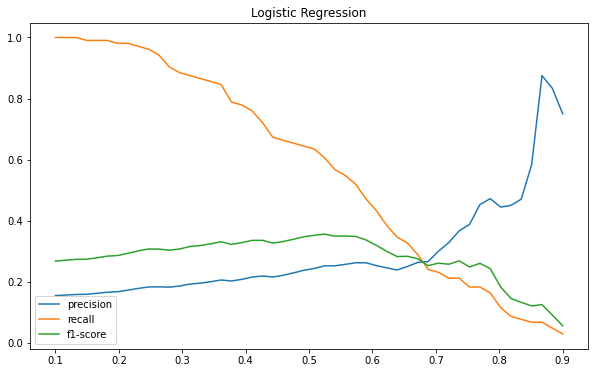

In [ ]:
# plotting the recall, precision and f1-score for different threshold of Logistic Regression
plt.figure(figsize = (10,6))
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = precisionscore, label = 'precision')
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = recallscore, label = 'recall')
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = f1scores, label = 'f1-score')
plt.title('Logistic Regression')
plt.show()